In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
data = pd.read_excel("cleaned_data_no_dummies.xlsx")

In [70]:
data = pd.read_excel("no_dummies_v2.xlsx")

In [4]:
dummy = pd.read_excel("cleand_data_with_dummies.xlsx")

In [45]:
dummy = pd.read_excel("dummies_v2.xlsx")

In [46]:
dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127 entries, 0 to 1126
Data columns (total 38 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   height                                   1127 non-null   float64
 1   weight                                   1127 non-null   float64
 2   upper_arm_length                         459 non-null    float64
 3   weight_x_repmax                          1127 non-null   object 
 4   orm                                      987 non-null    float64
 5   orm_as_%                                 987 non-null    float64
 6   max_pulls                                998 non-null    float64
 7   specific_training_time                   1117 non-null   object 
 8   sessions_per_week                        860 non-null    float64
 9   years_of_training                        870 non-null    float64
 10  pull_style_both                          178 non

In [71]:
copy = data.copy()
copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127 entries, 0 to 1126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   height                    1127 non-null   float64
 1   weight                    1127 non-null   float64
 2   upper_arm_length          459 non-null    float64
 3   pull_style                1127 non-null   object 
 4   weight_x_repmax           1127 non-null   object 
 5   orm                       987 non-null    float64
 6   orm_as_%                  987 non-null    float64
 7   orm_bins                  987 non-null    object 
 8   max_pulls                 998 non-null    float64
 9   oac_ability               1127 non-null   object 
 10  best_contribution_to_oac  946 non-null    object 
 11  specific_training_time    1117 non-null   object 
 12  sessions_per_week         860 non-null    float64
 13  years_of_training         870 non-null    float64
dtypes: float

In [150]:
copy.describe()

,height,weight,orm,max_pulls,sessions_per_week,years_of_training
count,1127.000000,1127.000000,987.000000,998.000000,860.000000,870.000000
mean,176.029839,71.358354,47.923036,21.065130,1.952035,1.702879
std,8.204170,9.049552,18.740911,6.618624,0.997572,1.621270
min,153.000000,38.555320,1.000000,10.000000,0.250000,0.025000
25%,172.000000,65.000000,35.992483,16.000000,1.000000,1.000000
50%,176.000000,71.000000,45.833333,20.000000,2.000000,1.000000
75%,182.000000,77.110640,57.833333,25.000000,2.000000,2.000000
max,197.000000,106.594120,156.200000,50.000000,7.000000,17.000000


<AxesSubplot:>

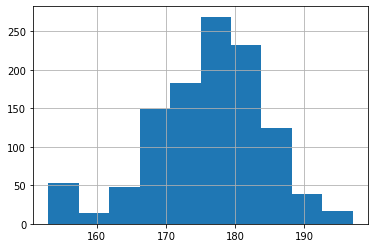

In [151]:
copy["height"].hist()

<AxesSubplot:>

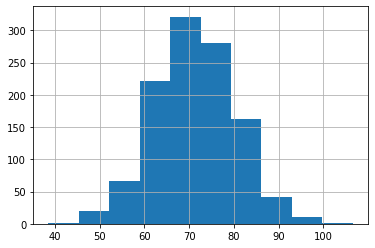

In [152]:
copy["weight"].hist()

<AxesSubplot:>

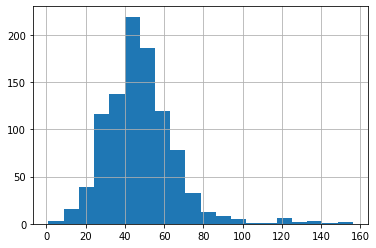

In [153]:
#besides some really elite pullers and people who don't know their orm, the distibution seems pretty normal
copy["orm"].hist(bins=20)

In [154]:
copy["pull_style"].value_counts()

wpu     613
both    178
none    167
wcu     163
rpu       4
npu       2
Name: pull_style, dtype: int64

Text(0, 0.5, 'Frequency')

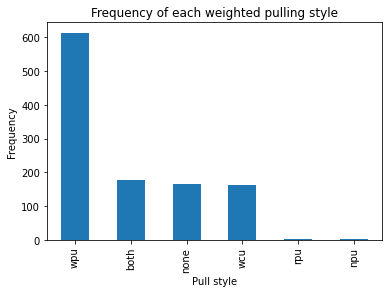

In [155]:
copy["pull_style"].value_counts().plot.bar()
plt.title("Frequency of each weighted pulling style")
plt.xlabel("Pull style")
plt.ylabel("Frequency")

### wpu = weighted pull up
### wcu = weighted chin up
### both = both
### npu = neutral grip pull up
### rpu = ring pull up
### none = does not do weighted pull ups

In [141]:
copy["oac_ability"].value_counts()

neither                        272
one-negative                   262
multiple-negatives/bad-form    198
both                           162
oap                             96
oac                             75
never-tried                     55
multiple-oap                     5
multiple-both                    1
multiple-oac                     1
Name: oac_ability, dtype: int64

Text(0.5, 0, 'OAC/OAP ability')

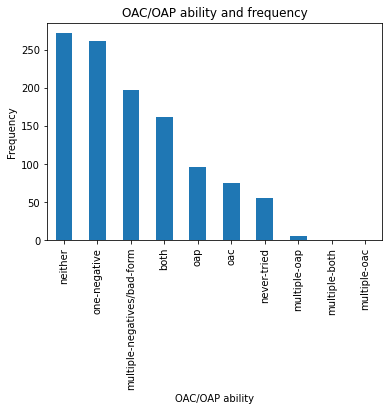

In [142]:
copy["oac_ability"].value_counts().plot.bar()

plt.title("OAC/OAP ability and frequency")
plt.ylabel("Frequency")
plt.xlabel("OAC/OAP ability")

### oac = one arm chin up
### oap = one arm pull up

In [143]:
def get_percentage(x):
    bw = x["weight"]
    orm = x["orm"]
    return orm/bw*100

### now will get orm as % of bodyweight, shortened to orm_as_%

In [156]:
copy["orm_as_%"] = copy.apply(get_percentage,axis=1)
copy.head()

,height,weight,upper_arm_length,pull_style,weight_x_repmax,orm,max_pulls,oac_ability,best_contribution_to_oac,specific_training_time,sessions_per_week,years_of_training,orm_as_%
0,180.0,84.0,38,wpu,51x1,51.0,NaN,one-negative,"pulley,high-volume,partials",2/2,2.0,2.0,60.714286
1,192.0,78.0,NaN,none,0x0,NaN,12.0,neither,NaN,0/0,NaN,NaN,NaN
2,168.0,55.0,NaN,wpu,75x1,75.0,18.0,multiple-negatives/bad-form,"climbers-approach,eccentrics,band",2/1,2.0,1.0,136.363636
3,190.0,80.0,14,wpu,25x1,25.0,10.0,neither,weighted-pulls,2/1,2.0,1.0,31.250000
4,172.0,68.0,NaN,wcu,40x2,47.2,18.0,neither,NaN,1/0,1.0,NaN,69.411765


In [157]:
cols = list(copy.columns)
popped = cols.pop()
cols.insert(6,popped)
copy = copy[cols]
copy.head()

,height,weight,upper_arm_length,pull_style,weight_x_repmax,orm,orm_as_%,max_pulls,oac_ability,best_contribution_to_oac,specific_training_time,sessions_per_week,years_of_training
0,180.0,84.0,38,wpu,51x1,51.0,60.714286,NaN,one-negative,"pulley,high-volume,partials",2/2,2.0,2.0
1,192.0,78.0,NaN,none,0x0,NaN,NaN,12.0,neither,NaN,0/0,NaN,NaN
2,168.0,55.0,NaN,wpu,75x1,75.0,136.363636,18.0,multiple-negatives/bad-form,"climbers-approach,eccentrics,band",2/1,2.0,1.0
3,190.0,80.0,14,wpu,25x1,25.0,31.250000,10.0,neither,weighted-pulls,2/1,2.0,1.0
4,172.0,68.0,NaN,wcu,40x2,47.2,69.411765,18.0,neither,NaN,1/0,1.0,NaN


<AxesSubplot:>

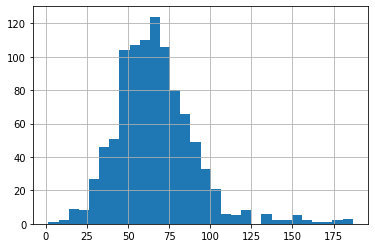

In [158]:
copy["orm_as_%"].hist(bins=30)

### looks like we have some people over reporting their weighted pull numbers or our formula is too optimistic
### hmmm what to do...

In [159]:
over_200 = copy[copy["orm_as_%"]>=150]
over_200

,height,weight,upper_arm_length,pull_style,weight_x_repmax,orm,orm_as_%,max_pulls,oac_ability,best_contribution_to_oac,specific_training_time,sessions_per_week,years_of_training
25,175.00,70.00000,NaN,wpu,115x2,127.333333,181.904762,20.0,one-negative,NaN,0/0,NaN,NaN
139,179.00,78.00000,NaN,wcu,120x1,120.000000,153.846154,17.0,one-negative,weighted-pulls,1/1,1.0,1.0
173,183.00,74.00000,NaN,wpu,125x1,125.000000,168.918919,25.0,multiple-negatives/bad-form,"eccentrics,weighted-pulls",3/2,3.0,2.0
182,178.00,72.00000,39,wpu,119x1,119.000000,165.277778,24.0,multiple-negatives/bad-form,"isometrics,weighted-pulls",1/1,1.0,1.0
224,183.00,76.00000,NaN,none,76x13,141.866667,186.666667,13.0,multiple-negatives/bad-form,"climbers-approach,eccentrics",3/2,3.0,2.0
234,165.00,58.00000,30,both,90x1,90.000000,155.172414,25.0,multiple-negatives/bad-form,weighted-pulls,1/1,1.0,1.0
253,179.00,79.00000,NaN,wpu,120x1,120.000000,151.898734,20.0,neither,pulley,2/1,2.0,1.0
388,189.00,86.00000,NaN,both,95x7,137.233333,159.573643,NaN,neither,"climbers-approach,eccentrics,mixed-grip/mantle...",1/1,1.0,1.0
394,185.00,85.00000,37,wcu,130x1,130.000000,152.941176,15.0,one-negative,"pulley,mixed-grip/mantle,weighted-pulls",1/7,1.0,7.0
532,183.00,83.00000,40,both,120x2,133.533333,160.883534,19.0,multiple-negatives/bad-form,"eccentrics,partials,weighted-pulls",3/3,3.0,3.0


In [13]:
import re

In [38]:
copy["upper_arm_length"] = copy["upper_arm_length"].apply(lambda x: str(x).replace("’",""))
copy["upper_arm_length"] = copy["upper_arm_length"].apply(lambda x: str(x).replace("..",""))
copy["upper_arm_length"] = copy["upper_arm_length"].apply(lambda x: str(x).replace("-",""))
copy["upper_arm_length"] = pd.to_numeric(copy["upper_arm_length"],errors='coerce')

In [41]:
copy.to_excel("no_dummies_v2.xlsx",index=False)

In [44]:
dummy["upper_arm_length"] = dummy["upper_arm_length"].apply(lambda x: str(x).replace("’",""))
dummy["upper_arm_length"] = dummy["upper_arm_length"].apply(lambda x: str(x).replace("..",""))
dummy["upper_arm_length"] = dummy["upper_arm_length"].apply(lambda x: str(x).replace("-",""))
dummy["upper_arm_length"] = pd.to_numeric(dummy["upper_arm_length"],errors='coerce')
dummy.to_excel("dummies_v2.xlsx",index=False)

<AxesSubplot:>

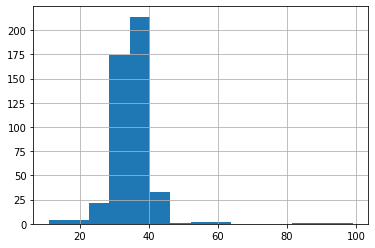

In [80]:
copy["upper_arm_length"].hist(bins=15)

In [160]:
copy.to_excel("no_dummies_v2.xlsx",index=False)

<AxesSubplot:>

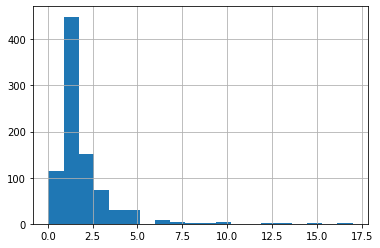

In [74]:
copy["years_of_training"].hist(bins=20)

<AxesSubplot:>

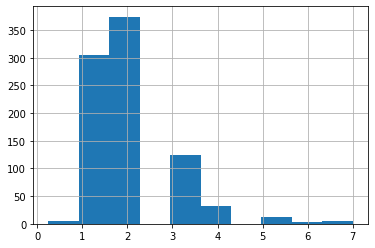

In [79]:
copy["sessions_per_week"].hist(bins=10)

In [163]:
dummy["orm_as_%"] = dummy.apply(get_percentage,axis=1)
cols = list(dummy.columns)
popped = cols.pop()
cols.insert(5,popped)
dummy = dummy[cols]
dummy.head()

,height,weight,upper_arm_length,weight_x_repmax,orm,orm_as_%,max_pulls,specific_training_time,sessions_per_week,years_of_training,...,best_oac_contribution_climbing,best_oac_contribution_eccentrics,best_oac_contribution_grip,best_oac_contribution_high-volume,best_oac_contribution_isometrics,best_oac_contribution_mixed-grip/mantle,best_oac_contribution_partials,best_oac_contribution_pulley,best_oac_contribution_rope-climbs,best_oac_contribution_weighted-pulls
0,180.0,84.0,38,51x1,51.0,60.714286,NaN,2/2,2.0,2.0,...,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN
1,192.0,78.0,NaN,0x0,NaN,NaN,12.0,0/0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,168.0,55.0,NaN,75x1,75.0,136.363636,18.0,2/1,2.0,1.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,190.0,80.0,14,25x1,25.0,31.250000,10.0,2/1,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,172.0,68.0,NaN,40x2,47.2,69.411765,18.0,1/0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [164]:
dummy.to_excel("dummies_v2.xlsx",index=False)

In [168]:
def orm_binning(x):
    prcnt  = x["orm_as_%"]
    if prcnt >= 180:
        return ">=180%"
    elif prcnt >= 160:
        return "160~179%"
    elif prcnt >=140:
        return "140~159%"
    elif prcnt >=120:
        return "120~139%"
    elif prcnt >=100:
        return "100~119%"
    elif prcnt >=80:
        return "80~99%"
    elif prcnt >=60:
        return "60~79%"
    elif prcnt >=40:
        return "40~59%"
    elif prcnt >=20:
        return "20~39%"
    elif prcnt >=0:
        return "0~19%"
    else:
        return None

In [169]:
copy["orm_bins"] = copy.apply(orm_binning,axis=1)
copy.head()

,height,weight,upper_arm_length,pull_style,weight_x_repmax,orm,orm_as_%,max_pulls,oac_ability,best_contribution_to_oac,specific_training_time,sessions_per_week,years_of_training,orm_bins
0,180.0,84.0,38,wpu,51x1,51.0,60.714286,NaN,one-negative,"pulley,high-volume,partials",2/2,2.0,2.0,60~79%
1,192.0,78.0,NaN,none,0x0,NaN,NaN,12.0,neither,NaN,0/0,NaN,NaN,None
2,168.0,55.0,NaN,wpu,75x1,75.0,136.363636,18.0,multiple-negatives/bad-form,"climbers-approach,eccentrics,band",2/1,2.0,1.0,120~139%
3,190.0,80.0,14,wpu,25x1,25.0,31.250000,10.0,neither,weighted-pulls,2/1,2.0,1.0,20~39%
4,172.0,68.0,NaN,wcu,40x2,47.2,69.411765,18.0,neither,NaN,1/0,1.0,NaN,60~79%


In [172]:
cols = list(copy.columns)
popped = cols.pop()
cols.insert(7,popped)
cols

['height',
 'weight',
 'upper_arm_length',
 'pull_style',
 'weight_x_repmax',
 'orm',
 'orm_as_%',
 'orm_bins',
 'max_pulls',
 'oac_ability',
 'best_contribution_to_oac',
 'specific_training_time',
 'sessions_per_week',
 'years_of_training']

In [174]:
copy = copy[cols]
copy.head()

,height,weight,upper_arm_length,pull_style,weight_x_repmax,orm,orm_as_%,orm_bins,max_pulls,oac_ability,best_contribution_to_oac,specific_training_time,sessions_per_week,years_of_training
0,180.0,84.0,38,wpu,51x1,51.0,60.714286,60~79%,NaN,one-negative,"pulley,high-volume,partials",2/2,2.0,2.0
1,192.0,78.0,NaN,none,0x0,NaN,NaN,None,12.0,neither,NaN,0/0,NaN,NaN
2,168.0,55.0,NaN,wpu,75x1,75.0,136.363636,120~139%,18.0,multiple-negatives/bad-form,"climbers-approach,eccentrics,band",2/1,2.0,1.0
3,190.0,80.0,14,wpu,25x1,25.0,31.250000,20~39%,10.0,neither,weighted-pulls,2/1,2.0,1.0
4,172.0,68.0,NaN,wcu,40x2,47.2,69.411765,60~79%,18.0,neither,NaN,1/0,1.0,NaN


In [177]:
groupby_oac = copy.groupby("oac_ability").mean()
groupby_oac = groupby_oac.iloc[[1,0,3,4,7,8,2,9,5,6]]
groupby_oac

,height,weight,orm,orm_as_%,max_pulls,sessions_per_week,years_of_training
oac_ability,,,,,,,
multiple-both,168.000000,67.000000,68.466667,102.189055,34.000000,3.000000,5.000000
both,173.272778,69.264733,60.430157,86.368664,27.979310,2.068015,2.466763
multiple-oac,172.000000,72.000000,70.000000,97.222222,33.000000,2.000000,0.300000
multiple-oap,170.732000,68.469112,56.599859,83.738820,30.000000,2.100000,1.400000
oac,174.844800,70.976992,52.805510,74.521552,22.625000,1.949275,2.465634
oap,174.500208,68.847890,53.249483,76.391014,25.129412,2.080000,2.115062
multiple-negatives/bad-form,175.863535,71.288316,50.974419,70.739238,21.254237,2.045455,1.411450
one-negative,177.123969,72.474229,44.712113,60.901473,19.700855,1.713270,1.366232
neither,177.788011,73.097262,39.109166,53.357643,16.819672,1.948276,1.309195


In [183]:
groupby_oac.to_excel("groupby_oac.xlsx")

In [181]:
oac_pivot = copy.pivot_table(index="oac_ability",columns="orm_bins",aggfunc="size",fill_value=0)
oac_pivot = oac_pivot[["0~19%","20~39%","40~59%","60~79%","80~99%","100~119%","120~139%","140~159%","160~179%",">=180%"]]
oac_pivot = oac_pivot.iloc[[1,0,3,4,7,8,2,9,5,6]]
oac_pivot

orm_bins,0~19%,20~39%,40~59%,60~79%,80~99%,100~119%,120~139%,140~159%,160~179%,>=180%
oac_ability,,,,,,,,,,
multiple-both,0,0,0,0,0,1,0,0,0,0
both,0,0,5,41,69,28,2,0,0,0
multiple-oac,0,0,0,0,1,0,0,0,0,0
multiple-oap,0,0,1,1,2,1,0,0,0,0
oac,1,1,11,30,23,2,2,0,0,0
oap,0,1,14,36,31,1,2,0,0,1
multiple-negatives/bad-form,1,10,40,87,21,5,2,3,3,1
one-negative,2,18,98,92,14,4,0,2,0,2
neither,6,50,119,50,2,0,4,4,1,0


In [184]:
oac_pivot.to_excel("oac_pivot.xlsx")

In [182]:
copy.to_excel("no_dummies_v2.xlsx",index=False)

In [49]:
copy_ = dummy.copy()
copy_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127 entries, 0 to 1126
Data columns (total 38 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   height                                   1127 non-null   float64
 1   weight                                   1127 non-null   float64
 2   upper_arm_length                         459 non-null    float64
 3   weight_x_repmax                          1127 non-null   object 
 4   orm                                      987 non-null    float64
 5   orm_as_%                                 987 non-null    float64
 6   max_pulls                                998 non-null    float64
 7   specific_training_time                   1117 non-null   object 
 8   sessions_per_week                        860 non-null    float64
 9   years_of_training                        870 non-null    float64
 10  pull_style_both                          178 non

### trying to find out what people consider the most beneficial to oac/oap ability

<AxesSubplot:>

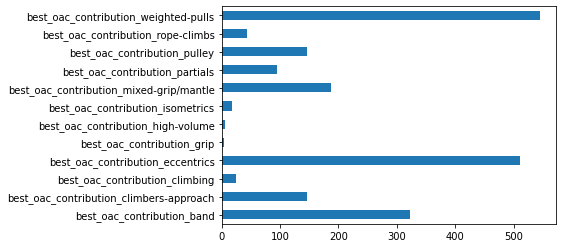

In [69]:
#cdo = contribution dummies only
cdo = copy_.iloc[:,26:]
cdo_sum = cdo.sum(axis=0)
cdo_sum.plot(kind="barh")

In [54]:
#df[(df.c >= value) & (df.d < value)]
multiple = copy_[(copy_["oac_ability_multiple-both"]>0)|(copy_["oac_ability_multiple-oac"]>0)|(copy_["oac_ability_multiple-oap"]>0)]
single = copy_[(copy_["oac_ability_both"]>0)|(copy_["oac_ability_oac"]>0)|(copy_["oac_ability_oap"]>0)]
almost = copy_[(copy_["oac_ability_multiple-negatives/bad-form"]>0)|(copy_["oac_ability_one-negative"]>0)]
none = copy_[(copy_["oac_ability_neither"]>0)|(copy_["oac_ability_never-tried"]>0)]

In [61]:
#cdo = contribution dummies only
multiple_cdo = multiple.iloc[:,26:]
single_cdo = single.iloc[:,26:]
almost_cdo = almost.iloc[:,26:]
none_cdo = none.iloc[:,26:]

<AxesSubplot:>

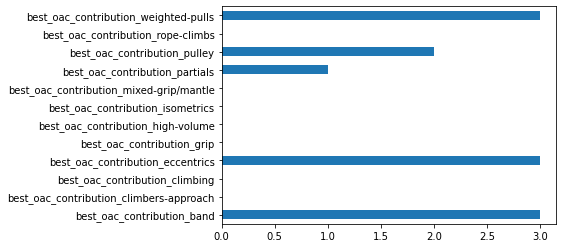

In [65]:
multiple_cdo_sum = multiple_cdo.sum(axis=0)
multiple_cdo_sum.plot(kind="barh")

In [89]:
multiple_cdo_sum.sort_values(ascending=False)

best_oac_contribution_band                 3.0
best_oac_contribution_eccentrics           3.0
best_oac_contribution_weighted-pulls       3.0
best_oac_contribution_pulley               2.0
best_oac_contribution_partials             1.0
best_oac_contribution_climbers-approach    0.0
best_oac_contribution_climbing             0.0
best_oac_contribution_grip                 0.0
best_oac_contribution_high-volume          0.0
best_oac_contribution_isometrics           0.0
best_oac_contribution_mixed-grip/mantle    0.0
best_oac_contribution_rope-climbs          0.0
dtype: float64

<AxesSubplot:>

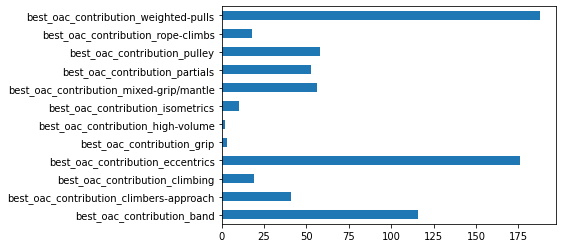

In [66]:
single_cdo_sum = single_cdo.sum(axis=0)
single_cdo_sum.plot(kind="barh")

In [88]:
single_cdo_sum.sort_values(ascending=False)

best_oac_contribution_weighted-pulls       188.0
best_oac_contribution_eccentrics           176.0
best_oac_contribution_band                 116.0
best_oac_contribution_pulley                58.0
best_oac_contribution_mixed-grip/mantle     56.0
best_oac_contribution_partials              53.0
best_oac_contribution_climbers-approach     41.0
best_oac_contribution_climbing              19.0
best_oac_contribution_rope-climbs           18.0
best_oac_contribution_isometrics            10.0
best_oac_contribution_grip                   3.0
best_oac_contribution_high-volume            2.0
dtype: float64

<AxesSubplot:>

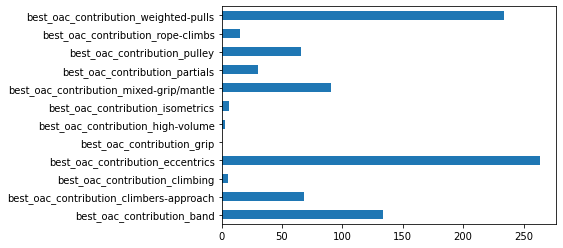

In [67]:
almost_cdo_sum = almost_cdo.sum(axis=0)
almost_cdo_sum.plot(kind="barh")

In [87]:
almost_cdo_sum.sort_values(ascending=False)

best_oac_contribution_eccentrics           264.0
best_oac_contribution_weighted-pulls       234.0
best_oac_contribution_band                 134.0
best_oac_contribution_mixed-grip/mantle     91.0
best_oac_contribution_climbers-approach     68.0
best_oac_contribution_pulley                66.0
best_oac_contribution_partials              30.0
best_oac_contribution_rope-climbs           15.0
best_oac_contribution_isometrics             6.0
best_oac_contribution_climbing               5.0
best_oac_contribution_high-volume            3.0
best_oac_contribution_grip                   0.0
dtype: float64

<AxesSubplot:>

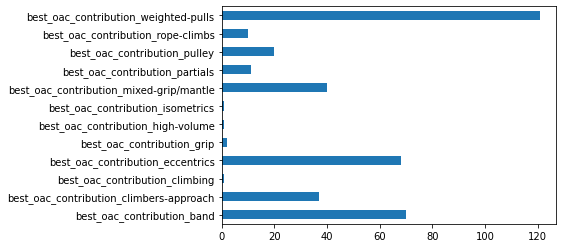

In [68]:
none_cdo_sum = none_cdo.sum(axis=0)
none_cdo_sum.plot(kind="barh")

In [90]:
none_cdo_sum.sort_values(ascending=False)

best_oac_contribution_weighted-pulls       121.0
best_oac_contribution_band                  70.0
best_oac_contribution_eccentrics            68.0
best_oac_contribution_mixed-grip/mantle     40.0
best_oac_contribution_climbers-approach     37.0
best_oac_contribution_pulley                20.0
best_oac_contribution_partials              11.0
best_oac_contribution_rope-climbs           10.0
best_oac_contribution_grip                   2.0
best_oac_contribution_climbing               1.0
best_oac_contribution_high-volume            1.0
best_oac_contribution_isometrics             1.0
dtype: float64

In [2]:
dummy = pd.read_excel("dummies_v2.xlsx")

In [3]:
dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127 entries, 0 to 1126
Data columns (total 38 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   height                                   1127 non-null   float64
 1   weight                                   1127 non-null   float64
 2   upper_arm_length                         459 non-null    float64
 3   weight_x_repmax                          1127 non-null   object 
 4   orm                                      987 non-null    float64
 5   orm_as_%                                 987 non-null    float64
 6   max_pulls                                998 non-null    float64
 7   specific_training_time                   1117 non-null   object 
 8   sessions_per_week                        860 non-null    float64
 9   years_of_training                        870 non-null    float64
 10  pull_style_both                          178 non

In [18]:
filtered_dummy = dummy[dummy["years_of_training"].notnull()]

In [19]:
filtered_dummy = filtered_dummy.reset_index()

In [13]:
filtered_dummy.to_excel("years of training only.xlsx")

In [14]:
def training_years_binning(x):
    years  = x["years_of_training"]
    if years >= 15:
        return ">=15"
    elif years >= 10:
        return ">=10"
    elif years >= 8:
        return ">=8"
    elif years >= 6:
        return ">=6"
    elif years >= 4:
        return ">=4"
    elif years >= 2:
        return ">=2"
    elif years >= 1:
        return ">=1"
    elif years >= 0.5:
        return ">=0.5"
    elif years >= 0:
        return "0"
    else:
        return None
    

In [20]:
filtered_dummy["years_of_training_binned"] = filtered_dummy.apply(training_years_binning,axis=1)

In [21]:
filtered_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 40 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   index                                    870 non-null    int64  
 1   height                                   870 non-null    float64
 2   weight                                   870 non-null    float64
 3   upper_arm_length                         362 non-null    float64
 4   weight_x_repmax                          870 non-null    object 
 5   orm                                      775 non-null    float64
 6   orm_as_%                                 775 non-null    float64
 7   max_pulls                                765 non-null    float64
 8   specific_training_time                   870 non-null    object 
 9   sessions_per_week                        831 non-null    float64
 10  years_of_training                        870 non-n

In [55]:
training_years_groupby = filtered_dummy.groupby("years_of_training_binned").agg({
    "orm_as_%":"mean",
    "oac_ability_multiple-both":"count",
    "oac_ability_multiple-oac":"count",
    "oac_ability_multiple-oap":"count",
    "oac_ability_both":"count",
    "oac_ability_oac":"count",
    "oac_ability_oap":"count",
    "oac_ability_multiple-negatives/bad-form":"count",
    "oac_ability_one-negative":"count",
    "oac_ability_neither":"count",
    "oac_ability_never-tried":"count"
})

In [56]:
training_years_groupby = training_years_groupby.iloc[[0,1,2,5,6,7,8,3,4]]

In [57]:
cols = list(training_years_groupby.columns)

In [58]:
cols = [i+" count" for i in cols if "oac" in i]

In [59]:
cols.insert(0,"orm_as_% average")

In [60]:
training_years_groupby.columns = cols

In [61]:
training_years_groupby

,orm_as_% average,oac_ability_multiple-both count,oac_ability_multiple-oac count,oac_ability_multiple-oap count,oac_ability_both count,oac_ability_oac count,oac_ability_oap count,oac_ability_multiple-negatives/bad-form count,oac_ability_one-negative count,oac_ability_neither count,oac_ability_never-tried count
years_of_training_binned,,,,,,,,,,,
0,65.778214,0,1,0,5,3,3,17,14,9,0
>=0.5,64.958123,0,0,0,7,2,6,20,13,13,1
>=1,65.830320,0,0,3,41,27,33,88,128,114,15
>=2,72.665250,0,0,2,55,22,26,38,45,32,5
>=4,79.305718,1,0,0,23,13,10,4,4,4,1
>=6,87.050487,0,0,0,5,2,2,0,1,2,0
>=8,81.605617,0,0,0,1,0,0,0,2,0,0
>=10,94.287703,0,0,0,2,2,0,1,0,0,0
>=15,86.428571,0,0,0,0,0,1,1,0,0,0


In [62]:
def height_binning(x):
    height  = x["height"]
    if height >= 190:
        return ">=190"
    elif height >= 180:
        return ">=180"
    elif height >= 170:
        return ">=170"
    elif height >= 160:
        return ">=160"
    elif height >= 150:
        return ">=150"
    else:
        return "<150"

In [63]:
dummy["height_binned"] = dummy.apply(height_binning,axis=1)

In [70]:
height_groupby = dummy.groupby("height_binned").agg({
    "orm_as_%":"mean",
    "oac_ability_multiple-both":"count",
    "oac_ability_multiple-oac":"count",
    "oac_ability_multiple-oap":"count",
    "oac_ability_both":"count",
    "oac_ability_oac":"count",
    "oac_ability_oap":"count",
    "oac_ability_multiple-negatives/bad-form":"count",
    "oac_ability_one-negative":"count",
    "oac_ability_neither":"count",
    "oac_ability_never-tried":"count"
})

In [72]:
cols_height = list(height_groupby.columns)
cols_height = [i+" count" for i in cols_height if "oac" in i]
cols_height.insert(0,"orm_as_% average")
cols_height

['orm_as_% average',
 'oac_ability_multiple-both count',
 'oac_ability_multiple-oac count',
 'oac_ability_multiple-oap count',
 'oac_ability_both count',
 'oac_ability_oac count',
 'oac_ability_oap count',
 'oac_ability_multiple-negatives/bad-form count',
 'oac_ability_one-negative count',
 'oac_ability_neither count',
 'oac_ability_never-tried count']

In [73]:
height_groupby.columns = cols_height
height_groupby

,orm_as_% average,oac_ability_multiple-both count,oac_ability_multiple-oac count,oac_ability_multiple-oap count,oac_ability_both count,oac_ability_oac count,oac_ability_oap count,oac_ability_multiple-negatives/bad-form count,oac_ability_one-negative count,oac_ability_neither count,oac_ability_never-tried count
height_binned,,,,,,,,,,,
>=150,64.065066,0,0,1,14,5,2,11,12,9,2
>=160,71.559351,1,0,1,30,10,17,23,21,14,6
>=170,67.153367,0,1,2,75,38,55,90,115,133,29
>=180,65.256319,0,0,1,38,21,18,67,106,97,16
>=190,65.094082,0,0,0,5,1,4,7,8,19,2
